In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [6]:
train.shape

(891, 12)

In [7]:
train[train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [8]:
train[train["Name"].str.contains("Dawson")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
train[train["Name"].str.contains("Bukater")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
train[train["Name"].str.contains("Brown")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


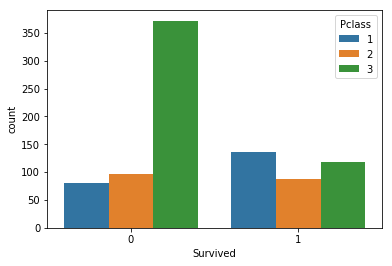

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

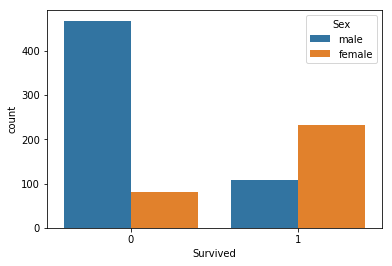

In [12]:
sns.countplot(x='Survived', hue='Sex', data=train)

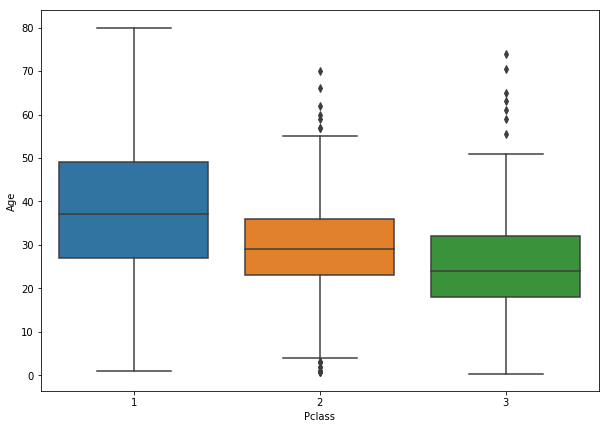

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age


In [15]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
train.drop("Cabin",inplace=True,axis=1)

In [17]:
train.dropna(inplace=True)

In [18]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [19]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [20]:
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
embarked = pd.get_dummies(train["Pclass"],drop_first=True)

In [21]:
train = pd.concat([train,sex,embarked],axis=1)

In [22]:
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [23]:
X = train.drop("Survived",axis=1)
y = train["Survived"]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

acc_log1 = round(logmodel.score(X_train, y_train) * 100, 2)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
acc_log1

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



79.74

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 36,  68]])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,predictions)

0.8127340823970037

In [34]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [36]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

74.92

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.71

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

85.37

In [39]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.46

In [40]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


60.77

In [41]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


66.24

In [42]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)   
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.87

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.74

In [46]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.87,Decision Tree
98.71,Random Forest
85.37,KNN
79.74,Logistic Regression
78.46,Naive Bayes
74.92,Stochastic Gradient Decent
66.24,Support Vector Machines
60.77,Perceptron


In [47]:
acc_log = round(logmodel.score(X_train, y_train) * 100, 2)
acc_log

79.74